In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso,Ridge
import random
random.seed(123)

In [16]:
df = pd.read_csv("data/output/output_complete.csv",sep=";") # loading dataframe build in previous steps.
df.head()

,State,Year,nephroptosis,necrobiosis lipoidica,renal insufficiency,high blood pressure,iron overload,pyelitis,pulmonary emphysema,gout,...,sepsis,pemphigus,erythropoietin,diabetes mellitus,Kawasaki Disease,chronic renal failure,rheumatic fever,ballottement,rheumatism,Data_Value
0,Alabama,2011,0,0,0,79,0,0,0,76,...,85,41,72,63,66,0,47,0,58,2.5
1,Alaska,2011,0,0,0,68,0,0,0,81,...,57,0,0,30,54,0,0,0,0,2.5
2,Arizona,2011,100,0,0,67,0,0,0,78,...,68,41,41,74,52,35,38,0,43,3.4
3,Arkansas,2011,0,0,0,89,0,0,0,83,...,79,42,45,63,57,0,62,0,41,2.8
4,California,2011,14,22,55,57,68,84,70,66,...,58,37,43,52,48,34,29,51,50,2.5


In [17]:
dfY=df.iloc[:,1:]
dfS=df.drop(["Year"],axis=1)
#train, validation = train_test_split(dfS, test_size=0.2)

train, validation = train_test_split(df, test_size=0.2)

### In the following steps we selected three linear regression models : a simple linear model, Ridge and Lasso.
### For each model we computed the mean squared error.

# Spatial Cross validation
In order to make spatial cross validation we used a sort of Leave-one(state)-out cross validation technique, for each state infact, we splitted the dataframe in train and test set and fitted the models and get a mean.

In [18]:

df_gt = pd.read_csv('data/BRFSS/2011_AA.csv', sep=";")
states = df_gt["LocationDesc"][0:51]


In [19]:


mseLM = []
mseLasso = []
mseRidge = []
# LOO CrossValidation

trainS=train.drop(["Year"],axis=1)


for state in states:
    trainK = trainS.loc[train["State"] == state]
    testK = trainS.drop(trainK.index)



    #LM
    lm = linear_model.LinearRegression()
    model = lm.fit(trainK.iloc[:,1:-1],trainK.iloc[:,-1])
    predictions = lm.predict(testK.iloc[:,1:-1])
    mseLM.append(np.mean((predictions - testK.iloc[:,-1])**2))

    #Lasso
    trainKnum = trainK.apply(pd.to_numeric, errors='coerce')
    testKnum = testK.apply(pd.to_numeric, errors='coerce')
    trainKnum.fillna(0, inplace=True)
    testKnum.fillna(0, inplace=True)
    
    lassoReg = Lasso()
    lassoReg.fit(trainK.iloc[:,1:-1],trainK.iloc[:,-1])
    predLasso = lassoReg.predict(testK.iloc[:,1:-1])
    mseLasso.append(np.mean((predLasso - testK.iloc[:,-1])**2))

    #Ridge
    ridgeReg = Ridge()
    ridgeReg.fit(trainK.iloc[:,1:-1],trainK.iloc[:,-1])
    predRidge = ridgeReg.predict(testK.iloc[:,1:-1])
    mseRidge.append(np.mean((predRidge - testK.iloc[:,-1])**2))

lmod = np.mean(mseLM)
las = np.mean(mseLasso)
ridge = np.mean(mseRidge)


print("Mean mse LM:",np.mean(mseLM))
print("Mean mse Lasso:",np.mean(mseLasso))
print("Mean mse Ridge:",np.mean(mseRidge))
print("Mean mse in spatial cv: ", np.mean([np.mean(mseLM),np.mean(mseLasso),np.mean(mseRidge)]))

Mean mse LM: 0.426737028449
Mean mse Lasso: 0.465323324995
Mean mse Ridge: 0.413382207118
Mean mse in spatial cv:  0.435147520187


# Temporal cross validation
In order to make a temporal cross validation, we divided in folds the dataset , one for each year and divided in train test set according to this division, computed the models in each fold and get a mean of the error.

In [20]:
mseLM = []
mseLasso = []
mseRidge = []
trainY=train.drop(["State"],axis=1)


for year in [2011,2012,2013,2014,2015,2016]:
    trainK = trainY.loc[train.Year == year]
    testK = trainY.drop(trainK.index)
    
    
    #lm
    lm = linear_model.LinearRegression()
    model = lm.fit(trainK.iloc[:,1:-1],trainK.iloc[:,-1])
    predictions = lm.predict(testK.iloc[:,1:-1])
    mseLM.append(np.mean((predictions - testK.iloc[:,-1])**2))


    
    #Lasso
    trainKnum = trainK.apply(pd.to_numeric, errors='coerce')
    testKnum = testK.apply(pd.to_numeric, errors='coerce')
    trainKnum.fillna(0, inplace=True)
    testKnum.fillna(0, inplace=True)
    
    lassoReg = Lasso()
    lassoReg.fit(trainK.iloc[:,1:-1],trainK.iloc[:,-1])
    predLasso = lassoReg.predict(testK.iloc[:,1:-1])
    mseLasso.append(np.mean((predLasso - testK.iloc[:,-1])**2))

    #Ridge
    ridgeReg = Ridge()
    ridgeReg.fit(trainK.iloc[:,1:-1],trainK.iloc[:,-1])
    predRidge = ridgeReg.predict(testK.iloc[:,1:-1])
    mseRidge.append(np.mean((predRidge - testK.iloc[:,-1])**2))

lm2 = np.mean(mseLM)
las2 = np.mean(mseLasso)
ridge2 = np.mean(mseRidge)



    

print("Mean mse LM:",np.mean(mseLM))
print("Mean mse Lasso:",np.mean(mseLasso))
print("Mean mse Ridge:",np.mean(mseRidge))
print("Mean mse in temporal cv: ", np.mean([np.mean(mseLM),np.mean(mseLasso),np.mean(mseRidge)]))

Mean mse LM: 0.28391834401
Mean mse Lasso: 0.226671007895
Mean mse Ridge: 0.284155176499
Mean mse in temporal cv:  0.264914842801


## Mean of each model error in the two cross validation types

In [21]:
print("lm:", np.mean([lmod,lm2]))
print("lasso:", np.mean([las,las2]))
print("ridge:", np.mean([ridge,ridge2]))

lm: 0.355327686229
lasso: 0.345997166445
ridge: 0.348768691809


## Lasso was the best performing model so we selected it to train on all the train set and test it on the validation set (not used till now)

In [22]:
# lasso best model
from sklearn.linear_model import Lasso
lassoReg = Lasso(0.2)
lassoReg.fit(train.iloc[:,1:-1],train.iloc[:,-1])
pred2 = lassoReg.predict(validation.iloc[:,1:-1])
# calculating mse
mse = np.mean((pred2 - validation.iloc[:,-1])**2)
print("mse: ",mse)
print("R squared: ",lassoReg.score(validation.iloc[:,1:-1],validation.iloc[:,-1]))

mse:  0.12424223712946586
R squared:  0.361685165029


## We let the Lasso linear model select the variables for us, giving them a null coefficients so making their predicting effect absent in the final model.

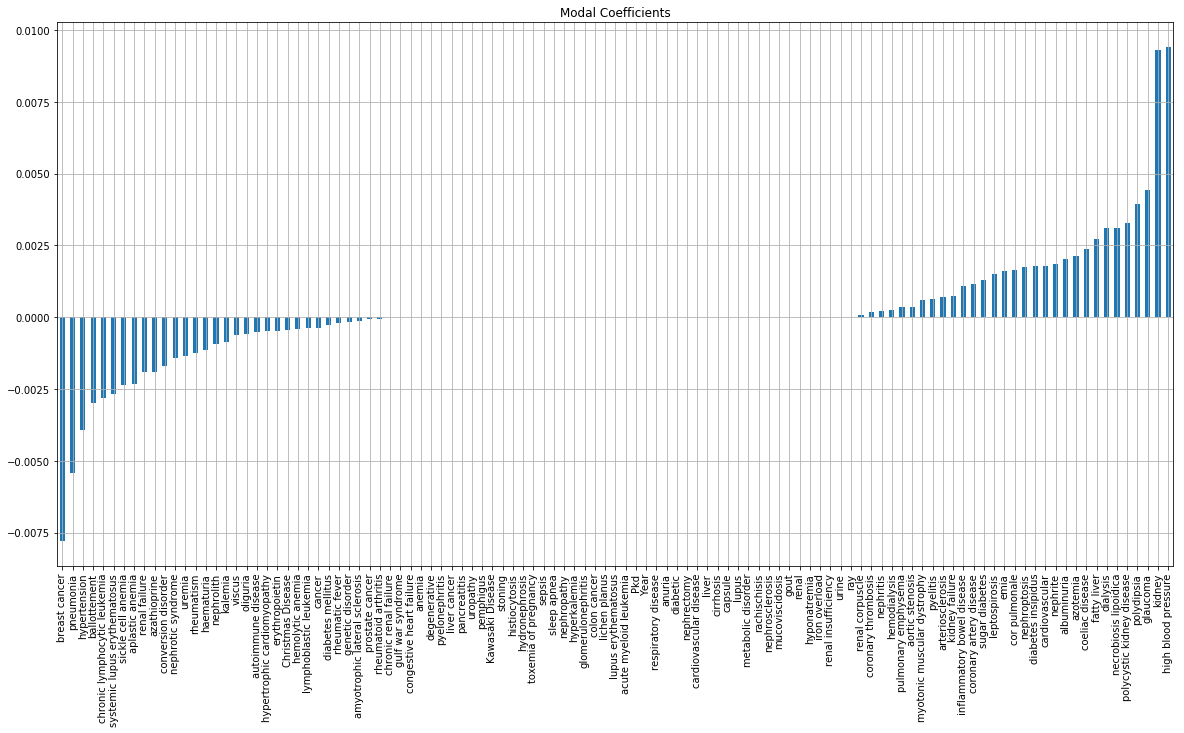

[  0.00000000e+00   1.75307912e-03   3.12369770e-03   0.00000000e+00
   9.40474197e-03  -0.00000000e+00   6.40202921e-04   3.45058178e-04
   0.00000000e+00   1.51154323e-03  -8.52235493e-04  -1.12943581e-03
  -0.00000000e+00  -1.91633845e-03   2.72040897e-03  -0.00000000e+00
   0.00000000e+00   1.73574313e-04  -4.49297401e-04   9.28892188e-03
   2.14234091e-03   0.00000000e+00   1.63069832e-03   3.10262844e-03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   3.26652300e-03   1.29941678e-03   0.00000000e+00   7.51406708e-04
   0.00000000e+00  -1.38493560e-04  -0.00000000e+00  -0.00000000e+00
   1.86884648e-03   1.62200772e-03   2.01448302e-03  -9.29629317e-04
  -2.32086726e-03   2.36911714e-03  -3.80786237e-04   1.17233021e-03
   4.43504590e-03   1.79844379e-03   3.56038231e-04   0.00000000e+00
   1.78526944e-03  -1.35703018e-03   2.29587407e-04  -4.81095968e-04
  -0.00000000e+00   6.96475038e-04  -0.00000000e+00   0.00000000e+00
   6.15738869e-04   0.00000000e+00

In [23]:
predictors = train.iloc[:,1:-1].columns
coef = pd.Series(lassoReg.coef_,predictors).sort_values()
plt.figure(figsize=(20,10))
coef.plot(kind='bar', title='Modal Coefficients',grid=True)
plt.show()
print(lassoReg.coef_)

## Added to our model census features at the US state level (income data)
## Adding the income variable we notice from the mse values that the predicting performance of our lasso model got better.




In [24]:
income= pd.read_csv("DELIVER/income.csv", sep=";")
_2011i = income.iloc[:,1]
_2012i = income.iloc[:,2]
_2013i = income.iloc[:,3]
_2014i = income.iloc[:,4]
_2015i = income.iloc[:,5]
_2016i = income.iloc[:,6]
income=pd.concat([_2011i,_2012i,_2013i,_2014i,_2015i,_2016i])

In [47]:
train["income"] = income.iloc[train.index].values
validation["income"] = income.iloc[validation.index].values
#pd.concat([train.income,validation.income],axis=1)

In [35]:
#validation.drop(["Data_Value"],axis=1)

In [27]:
from sklearn.linear_model import Lasso
train = train.apply(pd.to_numeric, errors='coerce')
validation = validation.apply(pd.to_numeric, errors='coerce')
train.fillna(0, inplace=True)
validation.fillna(0, inplace=True)
lassoReg = Lasso(alpha=0.2)
lassoReg.fit(train.drop(["Data_Value"],axis=1),train.Data_Value)
pred2 = lassoReg.predict(validation.drop(["Data_Value"],axis=1))
# calculating mse

mse = np.mean((pred2 - validation.Data_Value)**2)
print("mse :",mse)
print("R squared: ",lassoReg.score(validation.drop(["Data_Value"],axis=1),validation.Data_Value))

mse : 0.12465736180172675
R squared:  0.359552394058


lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
(np.mean((predictions - y_test)**2))



### As a result we get better results (mse reduction from 0.15 to 0.13) adding the "income" variable.

## We also added a state Health Insurance coverage indicator, for all the years

In [28]:
health = pd.read_csv("DELIVER/health.csv",sep=(";"))

In [29]:
_2011 = health.iloc[:,1]
_2012 = health.iloc[:,2]
_2013 = health.iloc[:,3]
_2014 = health.iloc[:,4]
_2015 = health.iloc[:,5]
_2016 = health.iloc[:,6]

In [30]:
health=pd.concat([_2011,_2012,_2013,_2014,_2015,_2016])

In [48]:
train["health"] = health.iloc[train.index].values
validation["health"] = health.iloc[validation.index].values

In [32]:

lassoReg1 = Lasso(alpha=0.2)
lassoReg1.fit(train.drop(["Data_Value"],axis=1),train.Data_Value)
pred3 = lassoReg1.predict(validation.drop(["Data_Value"],axis=1))
# calculating mse

mse = np.mean((pred3 - validation.Data_Value)**2)
print("mse :",mse)
print("R squared: ",lassoReg1.score(validation.drop(["Data_Value"],axis=1),validation.Data_Value))

mse : 0.12465736180172675
R squared:  0.359552394058


## Strangely we got exact same results of the previous model, so we can see that the model excluded the "health" variable giving a null coefficient, estimating not usefull for an improvement.

In [39]:
print("Coefficient of health variable:",lassoReg1.coef_[-1])

Coefficient of health variable: 0.0


# WITH health and income

In [49]:
#Ridge
ridgeReg = Ridge()
ridgeReg.fit(train.drop(["Data_Value"],axis=1),train.Data_Value)
predRidge = ridgeReg.predict(validation.drop(["Data_Value"],axis=1))
np.mean((predRidge - validation.Data_Value)**2)



0.17382565874946015

 # with income

In [50]:
train=train.drop(["health"],axis=1)
validation=validation.drop(["health"],axis=1)
#Ridge
ridgeReg = Ridge()
ridgeReg.fit(train.drop(["Data_Value"],axis=1),train.Data_Value)
predRidge = ridgeReg.predict(validation.drop(["Data_Value"],axis=1))
np.mean((predRidge - validation.Data_Value)**2)


0.16825942905307473

# with nothing

In [44]:
train=train.drop(["income"],axis=1)
validation=validation.drop(["income"],axis=1)
#Ridge
ridgeReg = Ridge()
ridgeReg.fit(train.drop(["Data_Value"],axis=1),train.Data_Value)
predRidge = ridgeReg.predict(validation.drop(["Data_Value"],axis=1))
np.mean((predRidge - validation.Data_Value)**2)



0.17793458781024157